In [2]:
from pytesseract import image_to_string
import os
os.sys.path
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import misc
import numpy as np

ModuleNotFoundError: ignored

In [ ]:
image_path = '/Users/esthermang/Desktop/02507/carpenter.jpg'
img=cv2.imread(image_path)

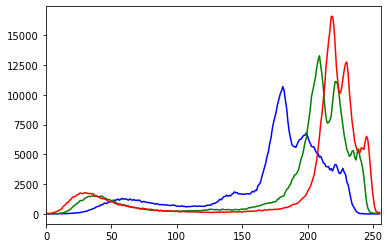

In [ ]:

img = cv.imread('carpenter.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

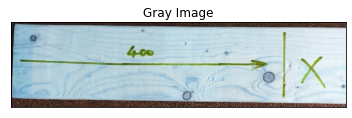

In [ ]:
# Convert the img to grayscale 
import cv2
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap = 'gray')
plt.title('Gray Image'), plt.xticks([]), plt.yticks([])
plt.show()
#cv2.imshow('gray', img)

In [ ]:
# Apply median blurring method on the image 
median_blur = cv2.medianBlur(gray,9)
cv2.imwrite('median_blur.jpg', gray)

True

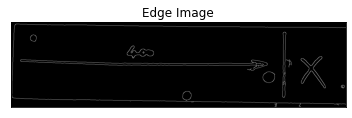

True

In [ ]:
# Apply edge detection method on the image 
edges = cv2.Canny(median_blur,255,10)
plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite('edges.jpg', edges)


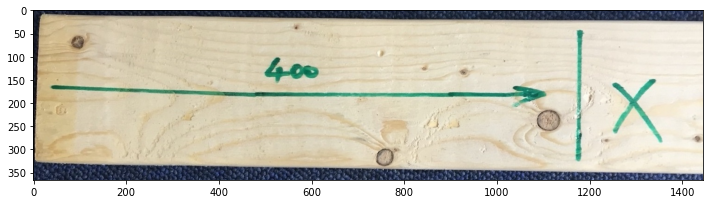

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('carpenter.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, figsize=(12,8))
plt.imshow(image)


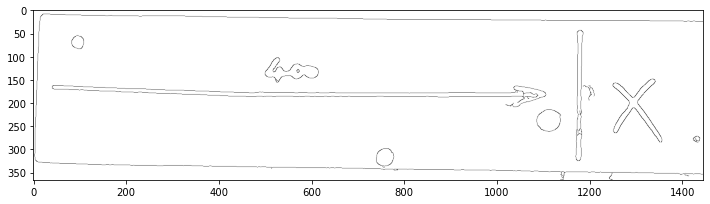

In [ ]:
g = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
#edge = cv2.Canny(g, 60, 180)
edge = cv2.Canny(median_blur,255,10)
fig, ax = plt.subplots(1, figsize=(12,8))
plt.imshow(edge, cmap='Greys')


Number of contours2


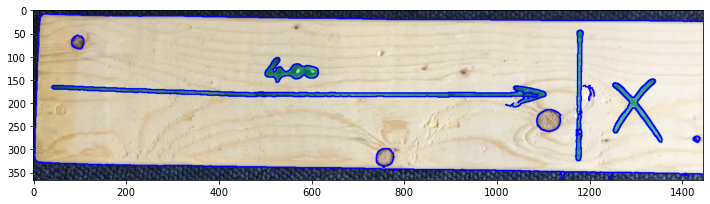

In [ ]:
contours = cv2.findContours(edge, 
                            cv2.RETR_EXTERNAL,
                            cv2.CHAIN_APPROX_NONE)

print("Number of contours" + str(len(contours)))

cv2.drawContours(image, contours[0], -1, (0,0,255), thickness = 2)
fig, ax = plt.subplots(1, figsize=(12,8))
plt.imshow(image)

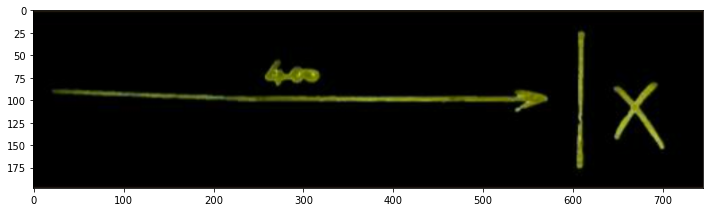

In [ ]:
# Apply edge detection method on the image 

image = cv2.imread('test1.PNG')
fig, ax = plt.subplots(1, figsize=(12,8))
plt.imshow(image)


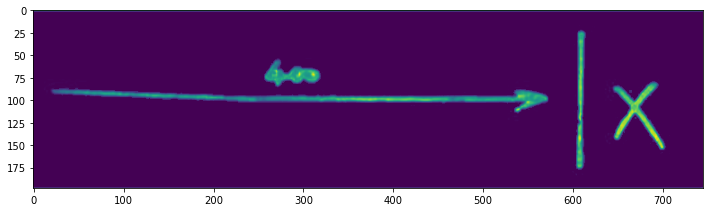

In [ ]:
img = cv.imread('test1.PNG',0)

fig, ax = plt.subplots(1, figsize=(12,8))
plt.imshow(img)

plt.show()


In [ ]:

def preprocessing(img):
    
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) #HSV
    # define range of blue color in HSV
    lower_green = np.array([55,50,0])
    upper_green = np.array([90,255,255])
    
    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_green, upper_green)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(img,img, mask= mask)
    
    #tresholding
    kernel = np.ones((5,5),np.uint8)
    gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)

    ret,thresh1 = cv2.threshold(gray,40,255,cv2.THRESH_BINARY)
    dilation = cv2.dilate(thresh1,kernel,iterations = 1)
    
    return dilation  


def preprocessing1(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    # threshold the image, then perform a series of erosions +
    # dilations to remove any small regions of noise
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)
    return thresh


def thresholding(image):
    #converting image into gray scale image
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # converting it to binary image by Thresholding
    # this step is require if you have colored image because if you skip this part 
    # then tesseract won't able to detect text correctly and this will give incorrect result
    threshold_img = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    #cv2.imwrite('threshold_image.jpg',threshold_img)
    return threshold_img

def draw_Houghlines(image):
    # detect edges
    edges = cv2.Canny(gray, 150, 300)

    # get lines
    # (x1, y1, x2, y2)
    lines = cv2.HoughLinesP(
        edges,
        rho=1.0,
        theta=np.pi/180,
        threshold=20,
        minLineLength=30,
        maxLineGap=10        
    )

    # draw lines
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    line_color = [0, 255, 0]
    line_thickness = 2
    dot_color = [0, 255, 0]
    dot_size = 3

    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(line_img, (x1, y1), (x2, y2), line_color, line_thickness)
            cv2.circle(line_img, (x1, y1), dot_size, dot_color, -1)
            cv2.circle(line_img, (x2, y2), dot_size, dot_color, -1)


    overlay = cv2.addWeighted(img, 0.8, line_img, 1.0, 0.0)
    #cv2.imwrite('houghlinesP1.jpg', overlay) 
    return overlay


def finding_Contours(image):
    edge = cv2.Canny(image,255,10)
    contours, h = cv2.findContours(edge, 
                               cv2.RETR_EXTERNAL,
                               cv2.CHAIN_APPROX_NONE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    return contours


def draw_contours(image):  
    # Iterate over the output "lines" and draw lines on the blank   
    # Draw all contours 
    # -1 signifies drawing all contours 
    image_contours = cv2.drawContours(image, contours, -1, (0, 255, 0), 3) 
    
    print("Number of contours = " + str(len(contours)))
    return  image_contours


def centroid(cnt):
    moment = cv2.moments(cnt)
    x = int(moment ["m10"] / moment["m00"])
    y = int(moment ["m01"] / moment["m00"])
    cv2.circle(img, (X, Y), 15, (205, 114, 101), 1)
    return x,y


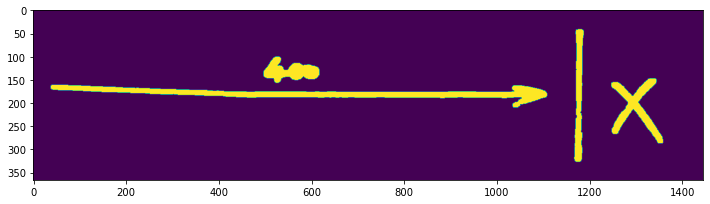

In [ ]:
img = cv.imread('carpenter.jpg')
img_res = preprocessing(img)
fig, ax = plt.subplots(1, figsize=(12,8))
plt.imshow(img_res)
plt.show()

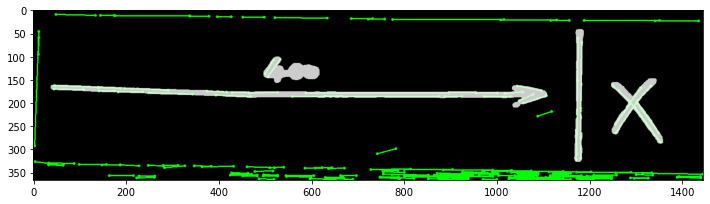

In [ ]:
img = cv.imread('test3.png')
img_res = draw_Houghlines(img)
fig, ax = plt.subplots(1, figsize=(12,8))
plt.imshow(img_res)
plt.show()

# Contours with Bounding box

In [ ]:
#image = cv2.imread('carpenter.jpg')
image = cv2.imread('test3.png')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

img = cv2.imread('test3.png')

edge = cv2.Canny(img,255,10)
contours, h = cv2.findContours(edge, 
                               cv2.RETR_EXTERNAL,
                               cv2.CHAIN_APPROX_NONE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)

boxes = list()
centroids = list()

for cnt in contours:
    cv2.drawContours(image, cnt, -1, (0,255,0), thickness = 5)
    x,y,w,h = cv2.boundingRect(cnt)
   
    
    cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
    cv2.putText(image, "w={},h={}".format(w,h), (x,y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (36,255,12), 2)


    aspect_ratio = float(w)/h
    print("The aspect ratio is ", aspect_ratio)
    area = cv2.contourArea(cnt)
    
    #centroid
    print("The centroid is ", centroid(cnt))
    
    rect_area = w*h
    print("The area is " , rect_area)
    extent = float(area)/rect_area
    
    if abs(aspect_ratio - 1) < 0.1 and extent > 0.7:
        boxes.append((x,y,w,h))
        
        
    # Identify shapes
    peri = cv2.arcLength(cnt,True)
    # Approximated curves
    approx = cv2.approxPolyDP(cnt, 0.02*peri, True)
    print("Approximated curves are ", len(approx))
    
    objCor = len(approx)
    
    
    if aspect_ratio == 4: objectType ="horizontal line"
 
    else:objectType="None"
    
                
fig, ax = plt.subplots(1, figsize=(12,8))
plt.imshow(image)

NameError: ignored

In [ ]:
# import the necessary packages
import numpy as np
import cv2
import imutils
 
# load the Tetris block image, convert it to grayscale, and threshold
# the image
image = cv2.imread("test3.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)[1]
 
# show the original and thresholded images
cv2.imshow("Original", image)
cv2.imshow("Thresh", thresh)
 
# find external contours in the thresholded image and allocate memory
# for the convex hull image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
hullImage = np.zeros(gray.shape[:2], dtype="uint8")

# loop over the contours
for (i, c) in enumerate(cnts):
    # compute the area of the contour along with the bounding box
    # to compute the aspect ratio
    area = cv2.contourArea(c)
    (x, y, w, h) = cv2.boundingRect(c)

    # compute the aspect ratio of the contour, which is simply the width
    # divided by the height of the bounding box
    aspectRatio = w / float(h)

    # use the area of the contour and the bounding box area to compute
    # the extent
    extent = area / float(w * h)

    # compute the convex hull of the contour, then use the area of the
    # original contour and the area of the convex hull to compute the
    # solidity
    hull = cv2.convexHull(c)
    hullArea = cv2.contourArea(hull)
    solidity = area / float(hullArea)

    # visualize the original contours and the convex hull and initialize
    # the name of the shape
    cv2.drawContours(hullImage, [hull], -1, 255, -1)
    cv2.drawContours(image, [c], -1, (240, 0, 159), 3)
    shape = ""
    
    # if the aspect ratio is approximately one, then the shape is a square
    if aspectRatio >= 0.98 and aspectRatio <= 1.02:
        shape = "SQUARE"

    # if the width is 3x longer than the height, then we have a rectangle
    elif aspectRatio >= 3.0:
        shape = "RECTANGLE"

    # if the extent is sufficiently small, then we have a L-piece
    elif extent < 0.65:
        shape = "L-PIECE"

    # if the solidity is sufficiently large enough, then we have a Z-piece
    elif solidity > 0.80:
        shape = "Z-PIECE"

    # draw the shape name on the image
    cv2.putText(image, shape, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
        (240, 0, 159), 2)

    # show the contour properties
    print("Contour #{} -- aspect_ratio={:.2f}, extent={:.2f}, solidity={:.2f}"
        .format(i + 1, aspectRatio, extent, solidity))

    # show the output images
    cv2.imshow("Convex Hull", hullImage)
    cv2.imshow("Image", image)
    cv2.waitKey(0)

error: ignored

In [ ]:
# import the necessary packages
import cv2
import imutils

# load the tic-tac-toe image and convert it to grayscale
image = cv2.imread("test3.png")
#image = cv2.imread("carpenter.jpg")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# find all contours on the tic-tac-toe board
cnts = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# loop over the contours
for (i, c) in enumerate(cnts):
    # compute the area of the contour along with the bounding box
    # to compute the aspect ratio
    area = cv2.contourArea(c)
    (x, y, w, h) = cv2.boundingRect(c)

    # compute the convex hull of the contour, then use the area of the
    # original contour and the area of the convex hull to compute the
    # solidity
    hull = cv2.convexHull(c)
    hullArea = cv2.contourArea(hull)
    solidity = area / float(hullArea)
    
    # initialize the character text
    char = "?"
 
    # if the solidity is high, then we are examining an `O`
    if solidity > 0.9:
        char = "O"
 
    # otherwise, if the solidity it still reasonabably high, we
    # are examining an `X`
    elif solidity > 0.5:
        char = "X"
 
    # if the character is not unknown, draw it
    if char != "?":
        cv2.drawContours(image, [c], -1, (0, 255, 0), 3)
        cv2.putText(image, char, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.25,
        (0, 255, 0), 4)
 
    # show the contour properties
    print("{} (Contour #{}) -- solidity={:.2f}".format(char, i + 1, solidity))
 
# show the output image
cv2.imshow("Output", image)
cv2.waitKey(0)

In [ ]:
#To find the co-ordinates of the contours detected in an image. 

import numpy as np 
import cv2 
  
# Reading image 
font = cv2.FONT_HERSHEY_COMPLEX 
img2 = cv2.imread('test3.png', cv2.IMREAD_COLOR) 
  
# Reading same image in another  
# variable and converting to gray scale. 
img = cv2.imread('test3.png', cv2.IMREAD_GRAYSCALE) 
  
# Converting image to a binary image 
# ( black and white only image). 
_, threshold = cv2.threshold(img, 110, 255, cv2.THRESH_BINARY) 
  
# Detecting contours in image. 
contours, _= cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

  
# Going through every contours found in the image. 
for cnt in contours : 
  
    approx = cv2.approxPolyDP(cnt, 0.1 * cv2.arcLength(cnt, True), True) 
    print(len(approx))
  
    # draws boundary of contours. 
    cv2.drawContours(img2, [approx], 0, (0, 0, 255), 5)  
  
    # Used to flatted the array containing 
    # the co-ordinates of the vertices. 
    n = approx.ravel()  
    i = 0
  
    for j in n : 
        if(i % 2 == 0): 
            x = n[i] 
            y = n[i + 1] 
  
            # String containing the co-ordinates. 
            string = str(x) + " " + str(y)  
  
            if(i == 0): 
                # text on topmost co-ordinate. 
                cv2.putText(img2, "Arrow tip", (x, y), 
                                font, 0.5, (255, 0, 0))  
            else: 
                # text on remaining co-ordinates. 
                cv2.putText(img2, string, (x, y),  
                          font, 0.5, (0, 255, 0))  
        i = i + 1
  


# Showing the final image.
cv2.imwrite('ConntourCoordinate.jpg',img2)
cv2.imshow('image2', img2) 

  # Exiting the window if 'q' is pressed on the keyboard. 
if cv2.waitKey(0) & 0xFF == ord('q'):  
    cv2.destroyAllWindows() 



In [ ]:
# Do relevant imports
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

# Read in and grayscale the image
image = mpimg.imread('carpenter.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Define our parameters for Canny and apply
low_threshold = 0
high_threshold = 350
masked_edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1
theta = np.pi/180
threshold = 10
min_line_length = 20
max_line_gap = 30
line_image = np.copy(image)*0 #creating a blank to draw lines on

# Run Hough on edge detected image
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on the blank
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(0,255,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((masked_edges, masked_edges, masked_edges)) 

# Draw the lines on the edge image
combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(combo)

# Experiments

## Resizing images

In [ ]:
import cv2

img = cv2.imread("py.png")
print(img.shape)
imgResize = cv2.resize(img,(1000,500))
print(imgResize.shape)

def imageResizing(x,y):
    imgResize = cv2.resize(img,(x,y))
    return imgResize

m=imageResizing(300,500)
print(m.shape)

#Cropping
imgCropped=img[0:200,200:500]
cv2.imshow("imgCropped",imgCropped)
cv2.imshow("img",img)


#Drawing lines
img = np.zeros((512,512,3),np.uint8)
cv2.line(img,(0,0),(img.shape[1], img.shape[0]),(0,255,0),3)
cv2.rectangle(img,(0,0),(250,350),(0,0,255),2)
cv2.circle(img,(400,50),30,(255,255,0),5)

cv2.imshow("image",img)

cv2.waitKey()

(696, 601, 3)
(500, 1000, 3)
(500, 300, 3)


-1

# Calculate Centroid

In [ ]:
import cv2

img = cv2.imread("py.png")
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
moment = cv2.moments(gray_img)
X = int(moment ["m10"] / moment["m00"])
Y = int(moment ["m01"] / moment["m00"])
cv2.circle(img, (X, Y), 15, (205, 114, 101), 1)
cv2.imshow("Center of the Image", img)
cv2.waitKey(0)
  


-1

# Rotation of image with opencv
https://www.life2coding.com/how-to-rotate-images-at-any-degree-usingtrackbar-in-opencv-python/

In [ ]:
import cv2
def funcRotate(degree=0):
    degree = cv2.getTrackbarPos('degree','Frame')
    rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), degree, 1)
    rotated_image = cv2.warpAffine(original, rotation_matrix, (width, height))
    cv2.imshow('Rotate', rotated_image)
    
if __name__== '__main__':
    original=cv2.imread('carpenter.jpg',1)
    height, width = original.shape[:2]
    cv2.namedWindow('Frame')
    degree=0
    cv2.createTrackbar('degree','Frame',degree,360,funcRotate)
    funcRotate(0)
    cv2.imshow('Frame',original)
    cv2.waitKey(0)
cv2.destroyAllWindows()


# Rotation of image with opencv

https://subscription.packtpub.com/book/application_development/9781785283932/1/ch01lvl1sec12/image-rotation

In [ ]:
import cv2
import numpy as np

img = cv2.imread('carpenter.jpg')
num_rows, num_cols = img.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
img_rotation = cv2.warpAffine(img, rotation_matrix, (num_cols, num_rows))
cv2.imshow('Rotation', img_rotation)
cv2.waitKey()


-1

# Rotaion

In [ ]:
import cv2
import imutils

image = cv2.imread('carpenter.jpg')
rot = imutils.rotate(image, angle=45)
cv2.imshow("Rotated", rot)
cv2.waitKey(0)

-1

# Region Props

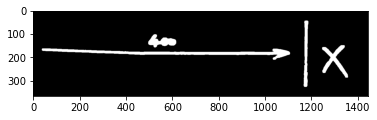

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from skimage.draw import ellipse
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate

import cv2 as cv

image = cv.imread('test3.png')

def regionprop(image):
    label_img = label(image)
    regions = regionprops(label_img) 
    print(len(regions))
    return regions

regions = regionprops(image)
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)
plt.show()

# How to fill contours 

In [ ]:
# How to fill contours 
# https://answers.opencv.org/question/225335/how-to-fill-closed-contours-of-edged-text-in-python/

import numpy as np
import cv2

contours = np.array( [ [50,50], [50,150], [150, 150], [150,50] ] )
img = np.zeros( (200,200) ) # create a single channel 200x200 pixel black image 
cv2.fillPoly(img, pts =[contours], color=(255,255,255))
cv2.imshow(" ", img)
cv2.waitKey()

-1

In [ ]:
def list_images(images, cols = 2, rows = 5, cmap=None):
    """
    Display a list of images in a single figure with matplotlib.
        Parameters:
            images: List of np.arrays compatible with plt.imshow.
            cols (Default = 2): Number of columns in the figure.
            rows (Default = 5): Number of rows in the figure.
            cmap (Default = None): Used to display gray images.
    """
    plt.figure(figsize=(10, 11))
    for i, image in enumerate(images):
        plt.subplot(rows, cols, i+1)
        #Use gray scale color map if there is only one channel
        cmap = 'gray' if len(image.shape) == 2 else cmap
        plt.imshow(image, cmap = cmap)
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()
    
def HSL_color_selection(image):
    """
    Apply color selection to the HSL images to blackout everything except for white and yellow lane lines.
        Parameters:
            image: An np.array compatible with plt.imshow.
    """
    #Convert the input image to HSL
    converted_image = convert_hsl(image)
    
    #White color mask
    lower_threshold = np.uint8([0, 200, 0])
    upper_threshold = np.uint8([255, 255, 255])
    white_mask = cv2.inRange(converted_image, lower_threshold, upper_threshold)
    
    #Yellow color mask
    lower_threshold = np.uint8([10, 0, 100])
    upper_threshold = np.uint8([40, 255, 255])
    yellow_mask = cv2.inRange(converted_image, lower_threshold, upper_threshold)
    
    #Combine white and yellow masks
    mask = cv2.bitwise_or(white_mask, yellow_mask)
    masked_image = cv2.bitwise_and(image, image, mask = mask)
    
    return masked_image

def region_selection(image):
    """
    Determine and cut the region of interest in the input image.
        Parameters:
            image: An np.array compatible with plt.imshow.
    """
    mask = np.zeros_like(image)   
    #Defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(image.shape) > 2:
        channel_count = image.shape[2]
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
    #We could have used fixed numbers as the vertices of the polygon,
    #but they will not be applicable to images with different dimesnions.
    rows, cols = image.shape[:2]
    bottom_left  = [cols * 0.1, rows * 0.95]
    top_left     = [cols * 0.4, rows * 0.6]
    bottom_right = [cols * 0.9, rows * 0.95]
    top_right    = [cols * 0.6, rows * 0.6]
    vertices = np.array([[bottom_left, top_left, top_right, bottom_right]], dtype=np.int32)
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

def region_selection(image):
    """
    Determine and cut the region of interest in the input image.
        Parameters:
            image: An np.array compatible with plt.imshow.
    """
    mask = np.zeros_like(image)   
    #Defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(image.shape) > 2:
        channel_count = image.shape[2]
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
    #We could have used fixed numbers as the vertices of the polygon,
    #but they will not be applicable to images with different dimesnions.
    rows, cols = image.shape[:2]
    bottom_left  = [cols * 0.1, rows * 0.95]
    top_left     = [cols * 0.4, rows * 0.6]
    bottom_right = [cols * 0.9, rows * 0.95]
    top_right    = [cols * 0.6, rows * 0.6]
    vertices = np.array([[bottom_left, top_left, top_right, bottom_right]], dtype=np.int32)
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

def hough_transform(image):
    """
    Determine and cut the region of interest in the input image.
        Parameters:
            image: The output of a Canny transform.
    """
    rho = 1              #Distance resolution of the accumulator in pixels.
    theta = np.pi/180    #Angle resolution of the accumulator in radians.
    threshold = 20       #Only lines that are greater than threshold will be returned.
    minLineLength = 20   #Line segments shorter than that are rejected.
    maxLineGap = 300     #Maximum allowed gap between points on the same line to link them
    return cv2.HoughLinesP(image, rho = rho, theta = theta, threshold = threshold,
                           minLineLength = minLineLength, maxLineGap = maxLineGap)

def average_slope_intercept(lines):
    """
    Find the slope and intercept of the left and right lanes of each image.
        Parameters:
            lines: The output lines from Hough Transform.
    """
    left_lines    = [] #(slope, intercept)
    left_weights  = [] #(length,)
    right_lines   = [] #(slope, intercept)
    right_weights = [] #(length,)
    
    for line in lines:
        for x1, y1, x2, y2 in line:
            if x1 == x2:
                continue
            slope = (y2 - y1) / (x2 - x1)
            intercept = y1 - (slope * x1)
            length = np.sqrt(((y2 - y1) ** 2) + ((x2 - x1) ** 2))
            if slope < 0:
                left_lines.append((slope, intercept))
                left_weights.append((length))
            else:
                right_lines.append((slope, intercept))
                right_weights.append((length))
    left_lane  = np.dot(left_weights,  left_lines) / np.sum(left_weights)  if len(left_weights) > 0 else None
    right_lane = np.dot(right_weights, right_lines) / np.sum(right_weights) if len(right_weights) > 0 else None
    return left_lane, right_lane

def pixel_points(y1, y2, line):
    """
    Converts the slope and intercept of each line into pixel points.
        Parameters:
            y1: y-value of the line's starting point.
            y2: y-value of the line's end point.
            line: The slope and intercept of the line.
    """
    if line is None:
        return None
    slope, intercept = line
    x1 = int((y1 - intercept)/slope)
    x2 = int((y2 - intercept)/slope)
    y1 = int(y1)
    y2 = int(y2)
    return ((x1, y1), (x2, y2))

def lane_lines(image, lines):
    """
    Create full lenght lines from pixel points.
        Parameters:
            image: The input test image.
            lines: The output lines from Hough Transform.
    """
    left_lane, right_lane = average_slope_intercept(lines)
    y1 = image.shape[0]
    y2 = y1 * 0.6
    left_line  = pixel_points(y1, y2, left_lane)
    right_line = pixel_points(y1, y2, right_lane)
    return left_line, right_line
    
def draw_lane_lines(image, lines, color=[255, 0, 0], thickness=12):
    """
    Draw lines onto the input image.
        Parameters:
            image: The input test image.
            lines: The output lines from Hough Transform.
            color (Default = red): Line color.
            thickness (Default = 12): Line thickness. 
    """
    line_image = np.zeros_like(image)
    for line in lines:
        if line is not None:
            cv2.line(line_image, *line,  color, thickness)
    return cv2.addWeighted(image, 1.0, line_image, 1.0, 0.0)

def frame_processor(image):
    """
    Process the input frame to detect lane lines.
        Parameters:
            image: Single video frame.
    """
    color_select = HSL_color_selection(image)
    gray         = gray_scale(color_select)
    smooth       = gaussian_smoothing(gray)
    edges        = canny_detector(smooth)
    region       = region_selection(edges)
    hough        = hough_transform(region)
    result       = draw_lane_lines(image, lane_lines(image, hough))
    return result

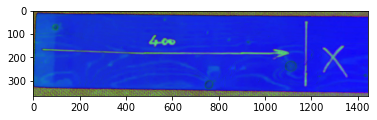

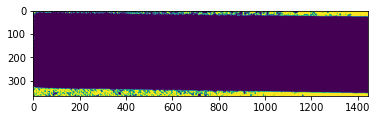

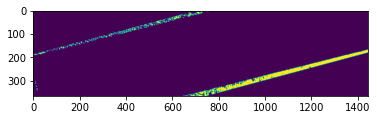

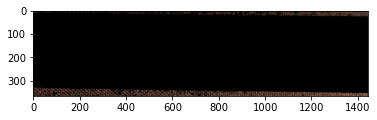

In [ ]:
import cv2
import numpy as np

frame = cv2.imread("carpenter.jpg")
# Convert BGR to HSV
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

# define range of blue color in HSV
lower_blue = np.array([110,50,50])
upper_blue = np.array([130,255,255])

# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, lower_blue, upper_blue)

rot = imutils.rotate(mask, angle=15)

# Bitwise-AND mask and original image
res = cv2.bitwise_and(frame,frame, mask= mask)

plt.imshow(hsv)
plt.show()
plt.imshow(mask)
plt.show()
plt.imshow(rot)
plt.show()
plt.imshow(res)
plt.show()

# Remove Background from an image



# Find Co-ordinates of Contours using OpenCV | Python

https://www.geeksforgeeks.org/find-co-ordinates-of-contours-using-opencv-python/

2
4
2
2


In [ ]:
import cv2
import numpy as np
# Load image, grayscale, blur, Otsu's threshold
image = cv2.imread('carpenter.jpg')
original = image.copy()
mask = np.zeros(image.shape, dtype=np.uint8)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Find horizontal lines
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50,1))
detect_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(detect_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(mask, [c], -1, (255,255,255), 3)

# Find vertical lines
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,50))
detect_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
cnts = cv2.findContours(detect_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(mask, [c], -1, (255,255,255), 3)

# Morph open
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=1)

# Draw rectangle and save each ROI
number = 0
cnts = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
    ROI = original[y:y+h, x:x+w]
    cv2.imwrite('ROI_{}.png'.format(number), ROI)
    number += 1

cv2.imshow('thresh', thresh)
cv2.imshow('mask', mask)
cv2.imshow('opening', opening)
cv2.imshow('image', image)
cv2.waitKey()

-1

# References

- https://github.com/techtribeyt/houghlinedetection/blob/master/detectLines.py
- https://www.youtube.com/watch?v=bZdBTUEgy9Q
- https://gurus.pyimagesearch.com/lesson-sample-advanced-contour-properties/

- https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contour_features/py_contour_features.html
